# Titanic Dataset: Basic Data Exploration



In [1]:
#Import Libraries
from matplotlib import pyplot as plt
import sklearn
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [2]:
#Import Dataset
train_dataset = pd.read_csv("dataset/train.csv")
test_datset = pd.read_csv("dataset/test.csv")

In [3]:
#Chnage Male/Female to numeric classes
train_dataset['Sex'].replace(to_replace=dict(female=0, male=1), inplace=True)
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_dataset.groupby('Survived',as_index=False).describe()

PassengerId                                                            \
        count        mean         std  min     25%    50%    75%    max   
0       549.0  447.016393  260.640469  1.0  211.00  455.0  675.0  891.0   
1       342.0  444.368421  252.358840  2.0  250.75  439.5  651.5  890.0   

  Survived         ...    Parch        Fare                             \
     count mean    ...      75%  max  count       mean        std  min   
0    549.0  0.0    ...      0.0  6.0  549.0  22.117887  31.388207  0.0   
1    342.0  1.0    ...      1.0  5.0  342.0  48.395408  66.596998  0.0   

                                  
       25%   50%   75%       max  
0   7.8542  10.5  26.0  263.0000  
1  12.4750  26.0  57.0  512.3292  

[2 rows x 64 columns]

## Exploratory Data Analysis 

### How does Gender affect chances of Survival?

Pearson Correlation Test = -0.5433513806577553


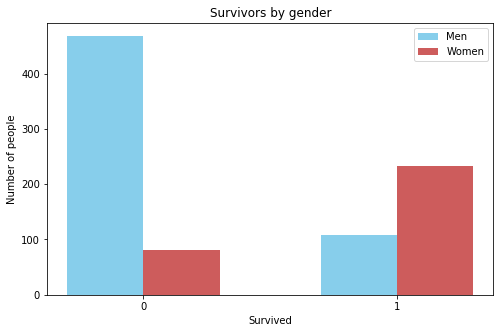

In [6]:
male = []
female = []
for i in [0, 1]:
    male.append(len(train_dataset.loc[(train_dataset['Survived'] == i) & (train_dataset['Sex'] == 1)]) )
    female.append(len(train_dataset.loc[(train_dataset['Survived'] == i) & (train_dataset['Sex'] == 0)]))

ind = np.arange(len(male)) 
width = 0.3  
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(ind - width/2, male, width, color='SkyBlue', label='Men')
ax.bar(ind + width/2, female, width, color='IndianRed', label='Women')


ax.set_ylabel('Number of people')
ax.set_xlabel('Survived')
ax.set_title('Survivors by gender')
ax.set_xticks(ind)
ax.set_xticklabels(["0", "1"])
ax.legend()

print("Pearson Correlation Test = {}".format(pearsonr(train_dataset["Sex"], train_dataset["Survived"])[0]) )

### How does Class affect chances of Survival?

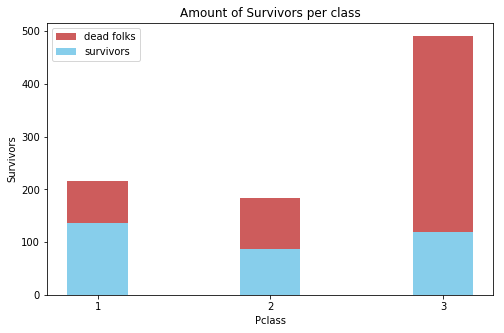

Pearson Correlation Test = -0.33848103596101536


In [8]:
uniq_pclass = [1,2,3]
Pclass_survivors = []
total_survivors = []
for i in uniq_pclass:
    Pclass_survivors.append(len(train_dataset.loc[(train_dataset['Survived'] == 1) & (train_dataset['Pclass'] == i)]) )
    total_survivors.append(len(train_dataset.loc[(train_dataset['Pclass'] == i)]) )
ind = np.arange(len(Pclass_survivors))  
width = 0.35 

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(ind, total_survivors, width, color='IndianRed', label="dead folks")
ax.bar(ind, Pclass_survivors, width, color='SkyBlue', label="survivors")

ax.set_ylabel('Survivors')
ax.set_xlabel('Pclass')
ax.set_title('Amount of Survivors per class')
ax.set_xticks(ind)
ax.set_xticklabels(uniq_pclass)
ax.legend()
plt.show()

print("Pearson Correlation Test = {}".format(pearsonr(train_dataset["Pclass"], train_dataset["Survived"])[0]))

### The effect of Age on Survival?

Pearson Correlation Test = -0.25408475420305304


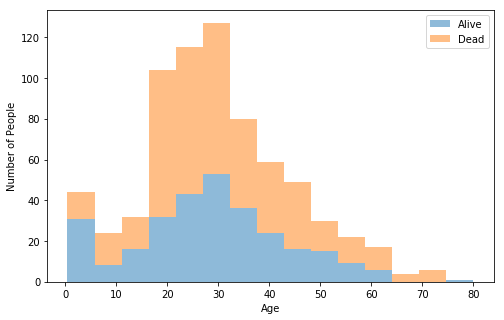

In [9]:
survived_age = pd.DataFrame(train_dataset.loc[(train_dataset['Survived'] == 1)].Age)
dead_age = pd.DataFrame(train_dataset.loc[(train_dataset['Survived'] == 0)].Age)
ages=pd.concat([survived_age, dead_age], axis=1)
ages.columns = ["Alive", "Dead"]

ax = ages.plot(kind='hist', alpha=0.5, stacked=True, bins=15, figsize=(8,5))
ax.set_xlabel("Age")
ax.set_ylabel("Number of People")

#Drop missing Ages
tra = train_dataset.dropna()
print("Pearson Correlation Test = {}".format(pearsonr(tra["Age"], tra["Survived"])[0]))

### Does Fare have an effect on who survives?

Pearson Correlation Test = 0.13424105283521096


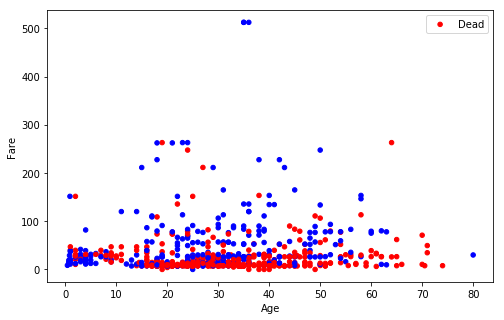

In [10]:
df1 = pd.DataFrame(train_dataset[["Survived", "Age", "Fare"]]) 
col = df1.Survived.map({0:'r', 1:'b'})
d=df1.plot(x='Age', y='Fare', c=col, kind='scatter', figsize=(8,5))

d.legend(["Dead"])

# Pearsons Correlation Test
tra = train_dataset.dropna()
print("Pearson Correlation Test = {}".format(pearsonr(tra["Fare"], tra["Survived"])[0]))

### Embarked?

C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\core\generic.py:2530: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


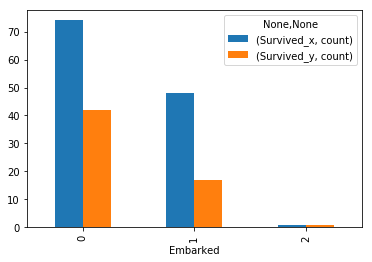

In [55]:
dropped_ = train_dataset.dropna()


dropped_['Embarked'].replace(to_replace=dict(S=0, C=1, Q=2), inplace=True)
dropped_.head()

df_s = pd.DataFrame(dropped_[["Survived", "Embarked"]].loc[(train_dataset['Survived'] == 1)]).groupby(['Embarked']).agg(['count']).reset_index()
df_d = pd.DataFrame(dropped_[["Survived", "Embarked"]].loc[(train_dataset['Survived'] == 0)]).groupby(['Embarked']).agg(['count']).reset_index()


df_embarked=pd.merge(df_s,df_d,on='Embarked', how='left')
df_embarked.plot(x = "Embarked", kind="bar")